# **IN-HEARING**

---

This project analyzes disabled population data with a focus on gender, employment status, and trends using linear regression models.

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas
df = pandas.read_csv('inhearing_s.csv')

Saving inhearing_s.csv to inhearing_s (2).csv


In [ ]:
print(df)

    Population  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0       380581         NaN         NaN         NaN   
1     49577103         NaN         NaN         NaN   
2      1383727         NaN         NaN         NaN   
3     31205567         NaN         NaN         NaN   
4    104099452         NaN         NaN         NaN   
5      1055450         NaN         NaN         NaN   
6     25545198         NaN         NaN         NaN   
7       343709         NaN         NaN         NaN   
8       243247         NaN         NaN         NaN   
9      1458545         NaN         NaN         NaN   
10    60439692         NaN         NaN         NaN   
11    25351462         NaN         NaN         NaN   
12     6864602         NaN         NaN         NaN   
13    12267032         NaN         NaN         NaN   
14    32988134         NaN         NaN         NaN   
15    61095297         NaN         NaN         NaN   
16    33406061         NaN         NaN         NaN   
17       64473         NaN  

***Total population vs disabled population***

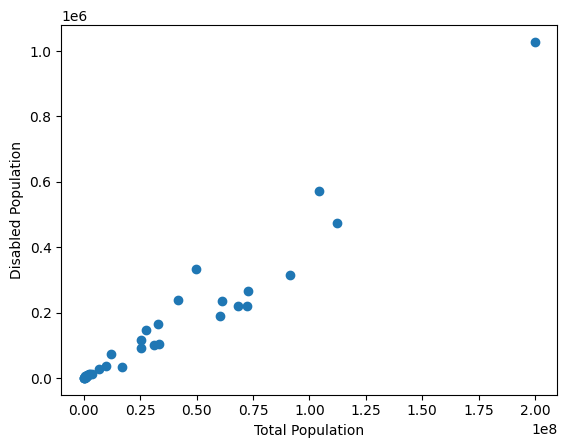

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Population'],df['Total disabled population - Persons'])
plt.xlabel("Total Population")
plt.ylabel("Disabled Population")
plt.savefig('total population vs disabled population-inhearing.png')

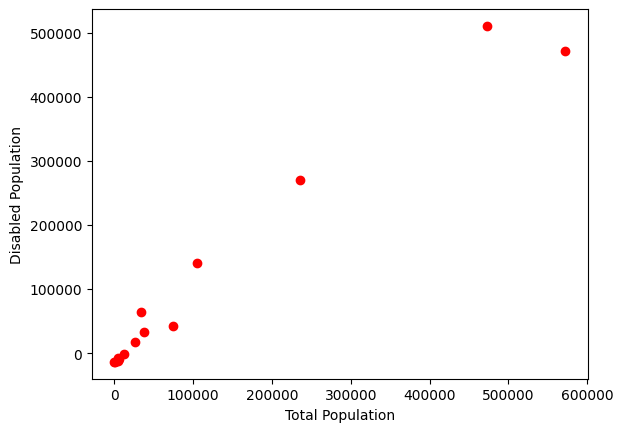

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Population']]
y=df['Total disabled population - Persons']
plt.xlabel("Total Population")
plt.ylabel("Disabled Population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
#Trying to get the Error margins of Linear Regression
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 26451.490656246566
MSE: 1229793733.111092
RMSE: 35068.41503562846


0.9614354122958488

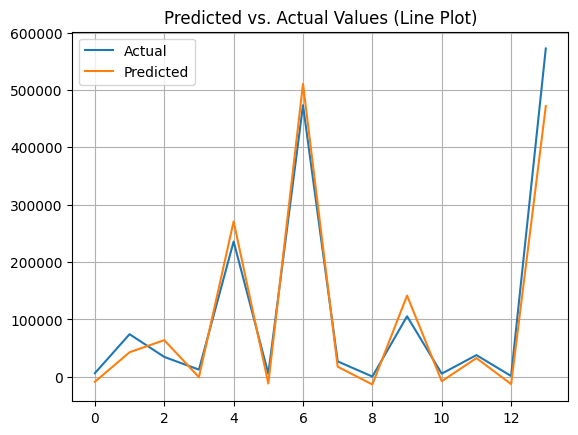

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.title("Predicted vs. Actual Values (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

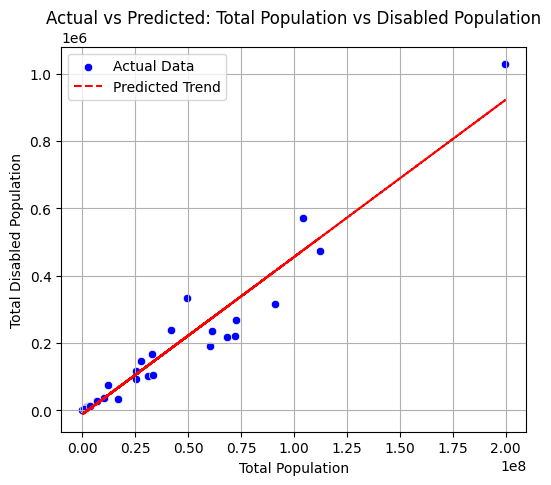

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

X = df["Population"].values.reshape(-1, 1)  # Total population
y = df["Total disabled population - Persons"].values.reshape(-1, 1)  # Disabled population

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot Actual vs. Predicted for Training Data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='blue', label="Actual Data")
plt.plot(X.flatten(), y_pred.flatten(), 'r--', label="Predicted Trend")
plt.xlabel("Total Population")
plt.ylabel("Total Disabled Population")
plt.title("Actual vs Predicted: Total Population vs Disabled Population")
plt.legend()
plt.grid(True)
plt.show()

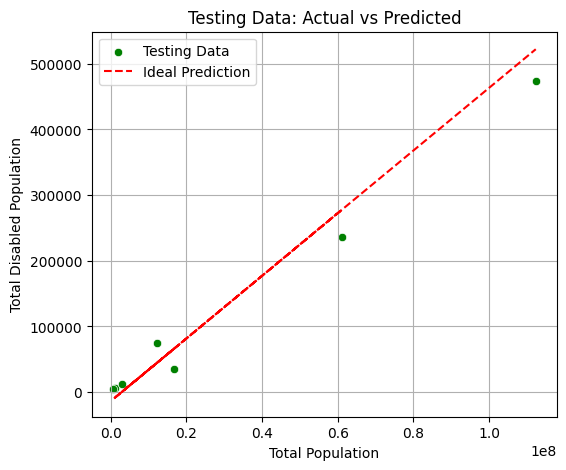

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Extract relevant columns
X = df["Population"].values.reshape(-1, 1)  # Total population
y = df["Total disabled population - Persons"].values.reshape(-1, 1)  # Disabled population

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Plot Actual vs. Predicted for Testing Data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), color='green', label="Testing Data")
plt.plot(X_test.flatten(), y_test_pred.flatten(), 'r--', label="Ideal Prediction")
plt.xlabel("Total Population")
plt.ylabel("Total Disabled Population")
plt.title("Testing Data: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


Saving inhearing new.csv to inhearing new.csv


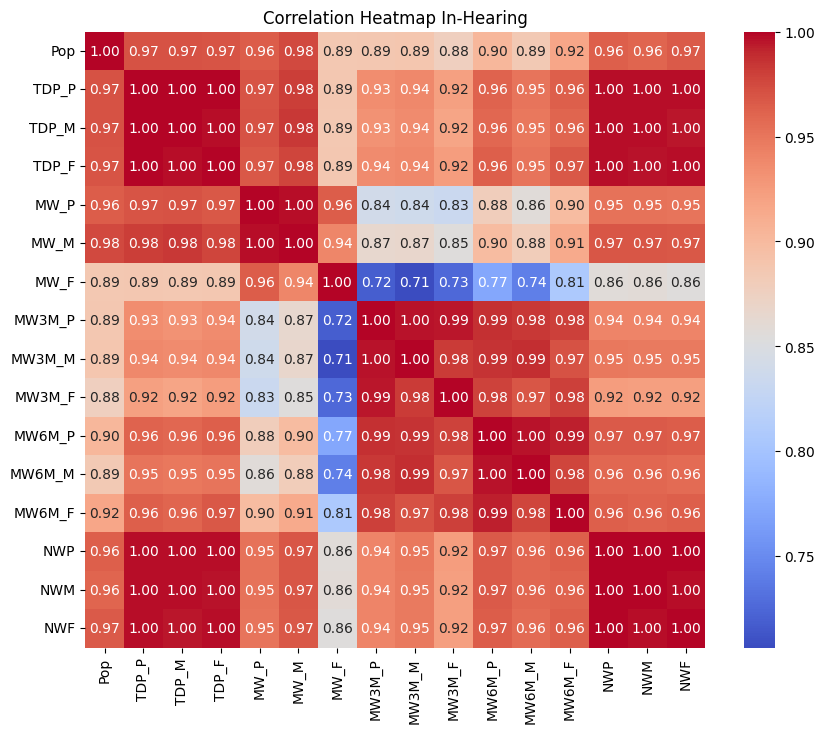

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
file_name = list(uploaded.keys())[0]  # Automatically get the uploaded file's name
data = pd.read_csv(file_name)

# Drop "State Code" and "District Code" columns and select numerical data
data_numeric = data.select_dtypes(include='number').drop(columns=["State Code", "District Code"], errors='ignore')

# Create a dictionary of short labels for variables
short_labels = {
    "Population": "Pop",
    "Total disabled population - Persons": "TDP_P",
    "Total disabled population - Males": "TDP_M",
    "Total disabled population - Females": "TDP_F",
    "Main worker - Persons": "MW_P",
    "Main worker - Males": "MW_M",
    "Main worker - Females": "MW_F",
    "Marginal worker - Less than 3 months - Persons": "MW3M_P",
    "Marginal worker - Less than 3 months - Males": "MW3M_M",
    "Marginal worker - Less than 3 months - Females": "MW3M_F",
    "Marginal worker - 3-6 months - Persons": "MW6M_P",
    "Marginal worker - 3-6 months - Males": "MW6M_M",
    "Marginal worker - 3-6 months - Females": "MW6M_F",
    "Non-worker - Persons": "NWP",
    "Non-worker - Males": "NWM",
    "Non-worker - Females": "NWF"
}

# Rename columns for better readability
data_numeric_short = data_numeric.rename(columns=short_labels)

# Compute the correlation matrix
correlation_matrix_short = data_numeric_short.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_short, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap In-Hearing')
plt.show()


## 📁 Disabled Population Analysis

### 👨 Male
- 👷‍♂️ Working
- 🚫 Non-working

### 👩 Female
- 👷‍♀️ Working
- 🚫 Non-working

### Male

***Disabled population (Total vs Male)***

Text(0, 0.5, 'Disabled population-male')

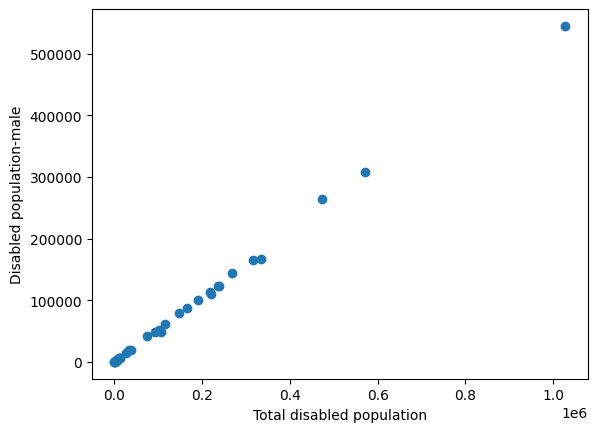

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Persons'],df['Total disabled population - Males'])
plt.xlabel("Total disabled population")
plt.ylabel("Disabled population-male")

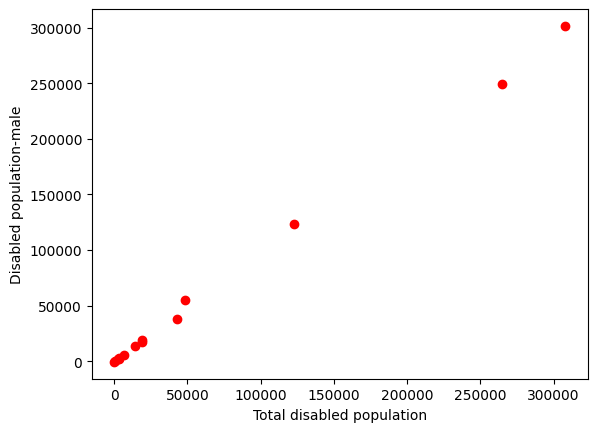

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Persons']]
y=df['Total disabled population - Males']
plt.xlabel("Total disabled population")
plt.ylabel("Disabled population-male")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
#Trying to get the Error margins of Linear Regression
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 2985.722794351254
MSE: 26013128.273297675
RMSE: 5100.306684239456


0.997263242644752

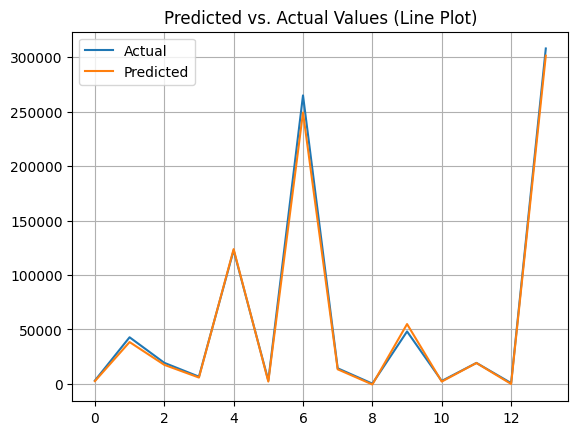

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.title("Predicted vs. Actual Values (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

#### working male

Text(0, 0.5, 'Total working male disabled population')

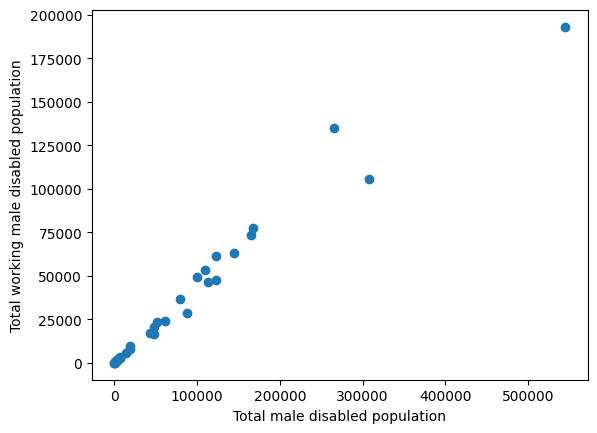

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Males'],df['Main worker - Males'])
plt.xlabel("Total male disabled population")
plt.ylabel("Total working male disabled population")

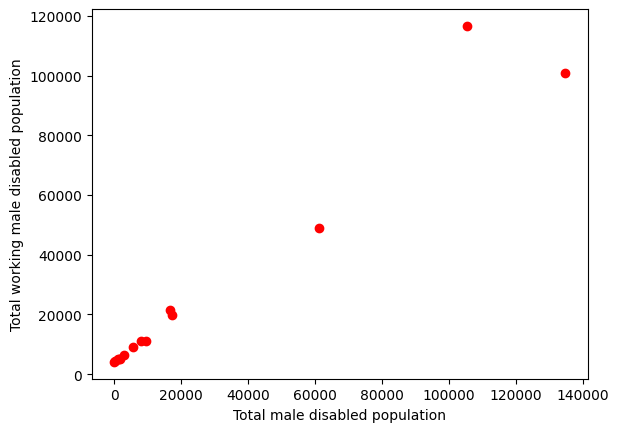

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Males']]
y=df['Main worker - Males']
plt.xlabel("Total male disabled population")
plt.ylabel("Total working male disabled population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 6803.979301006295
MSE: 111953826.14218925
RMSE: 10580.82350964183


0.9353885083767246

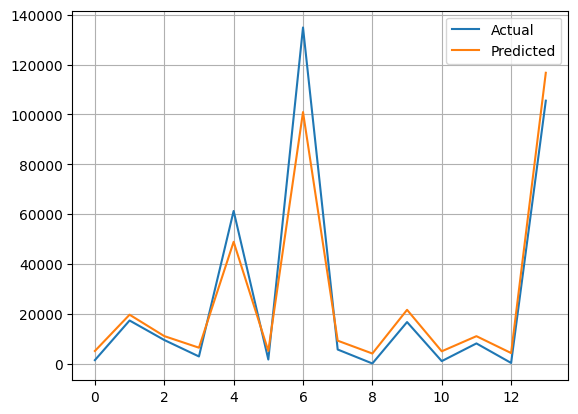

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.legend()
plt.grid(True)
plt.show()

#### non working male

Text(0, 0.5, 'Total non-working male disabled population')

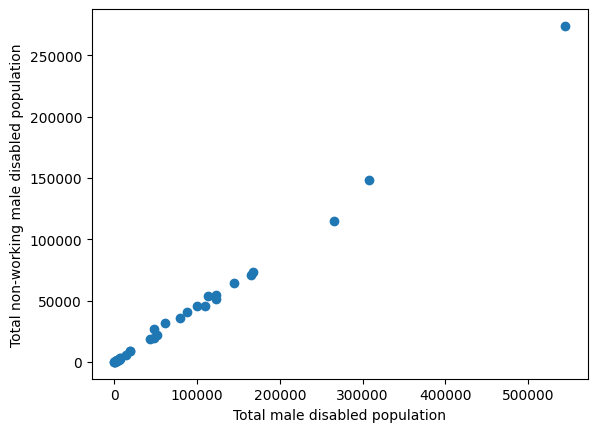

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Males'],df['Non-worker - Males'])
plt.xlabel("Total male disabled population")
plt.ylabel("Total non-working male disabled population")

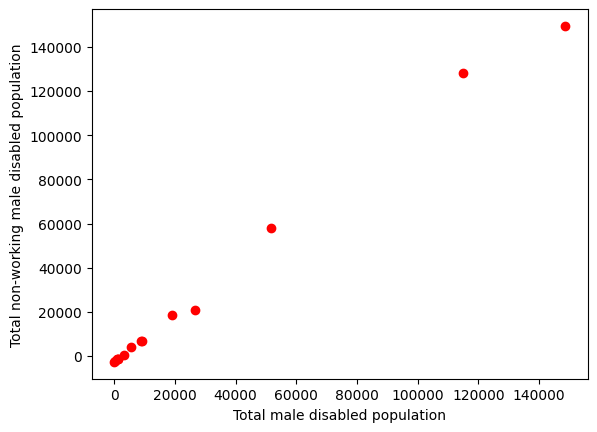

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Males']]
y=df['Non-worker - Males']
plt.xlabel("Total male disabled population")
plt.ylabel("Total non-working male disabled population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 3403.9376476795155
MSE: 21152212.065876644
RMSE: 4599.153407517154


0.9895474234829897

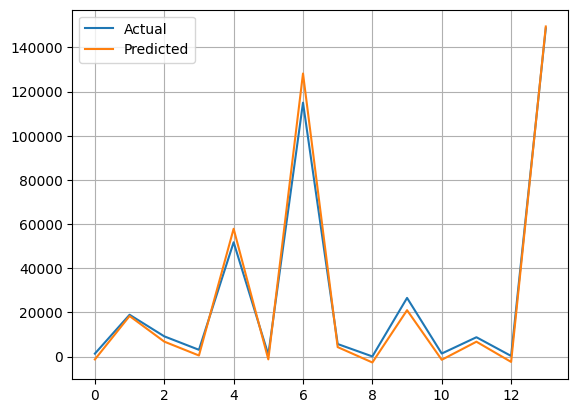

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.legend()
plt.grid(True)
plt.show()

### Female

***Disabled popualtion (Total vs female)***

Text(0, 0.5, 'Disabled population-female')

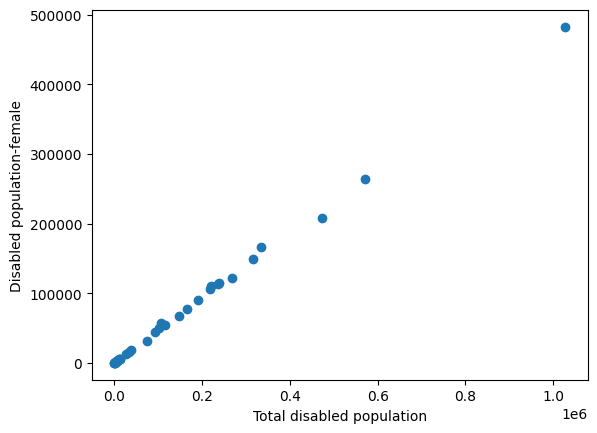

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Persons'],df['Total disabled population - Females'])
plt.xlabel("Total disabled population")
plt.ylabel("Disabled population-female")

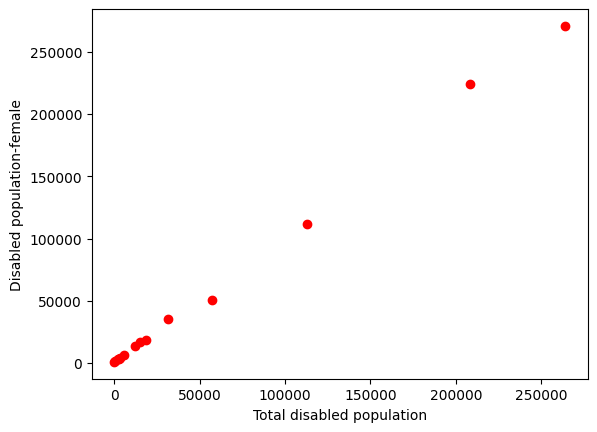

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Persons']]
y=df['Total disabled population - Females']
plt.xlabel("Total disabled population")
plt.ylabel("Disabled population-female")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
#Trying to get the Error margins of Linear Regression
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 2985.7227943512444
MSE: 26013128.273297664
RMSE: 5100.306684239455


0.9960574579238853

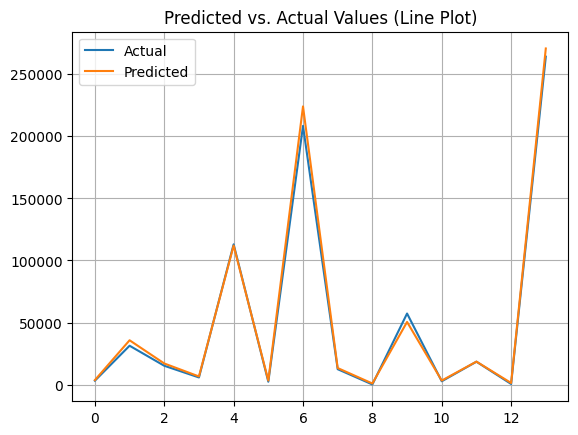

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.title("Predicted vs. Actual Values (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

#### working female

Text(0, 0.5, 'Total working female disabled population')

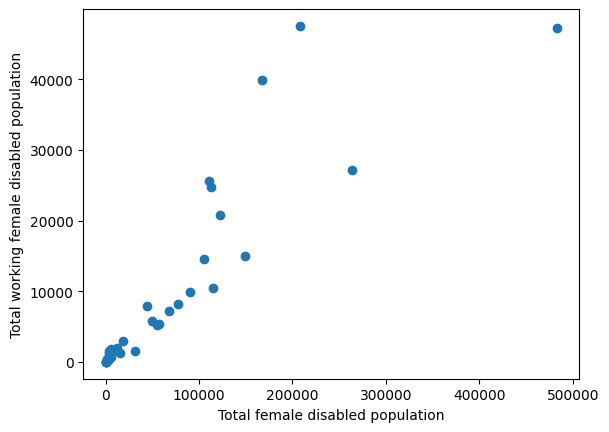

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Females'],df['Main worker - Females'])
plt.xlabel("Total female disabled population")
plt.ylabel("Total working female disabled population")

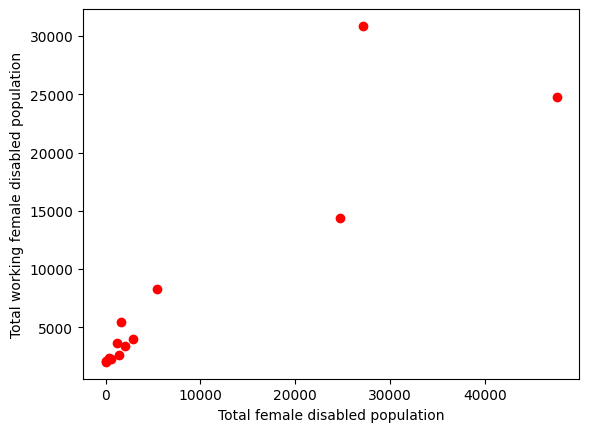

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Females']]
y=df['Main worker - Females']
plt.xlabel("Total female disabled population")
plt.ylabel("Total working female disabled population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
#Trying to get the Error margins of Linear Regression
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 4251.840497649663
MSE: 49615395.941875145
RMSE: 7043.819698279844


0.7434476959434401

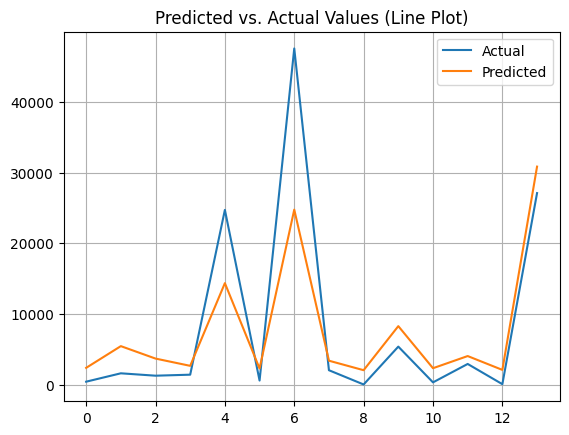

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.title("Predicted vs. Actual Values (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

#### non-working females

Text(0, 0.5, 'Total non-working female disabled population')

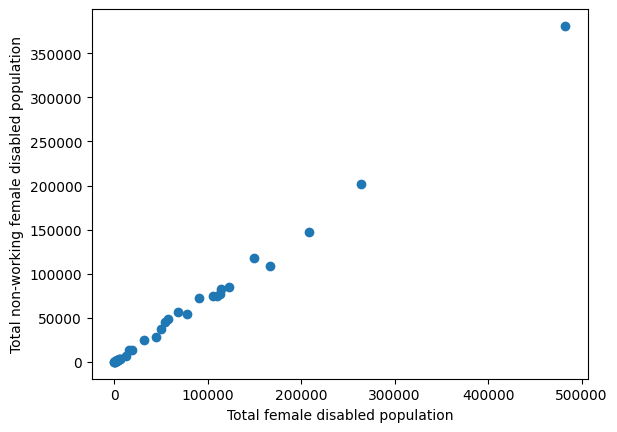

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Total disabled population - Females'],df['Non-worker - Females'])
plt.xlabel("Total female disabled population")
plt.ylabel("Total non-working female disabled population")

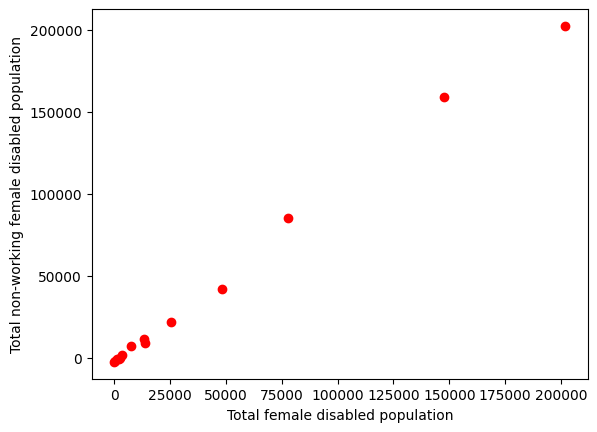

In [ ]:
#Using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df[['Total disabled population - Females']]
y=df['Non-worker - Females']
plt.xlabel("Total female disabled population")
plt.ylabel("Total non-working female disabled population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
#What is meant by lm.fit()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Comparing the predicted values with the Actual values
#Plotting
plt.scatter(y_test,predictions,c='red')
#print(y_test,'',predictions)
#print(X_test)

In [ ]:
#Trying to get the Error margins of Linear Regression
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
lm.score(X_test,y_test)

MAE: 3673.333070063291
MSE: 22007861.38409842
RMSE: 4691.2537113332955


0.9939251801584333

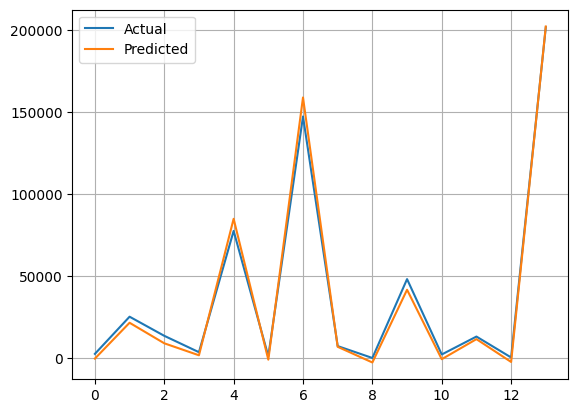

In [ ]:
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.legend()
plt.grid(True)
plt.show()